### Import Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

In [51]:
customers_data_com = pd.read_csv("datasets/combined_customers_data")

customers_data_com.head()

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
customers_data_com.describe()

,CustomerID,Age,Annual_Income,Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.00000
mean,100.500000,39.115000,59.815000,50.61500
std,57.879185,13.821612,27.738564,25.63283
min,1.000000,18.000000,6.000000,1.00000
25%,50.750000,29.000000,40.000000,35.00000
50%,100.500000,36.000000,60.500000,50.00000
75%,150.250000,49.000000,77.250000,73.00000
max,200.000000,70.000000,170.000000,98.00000


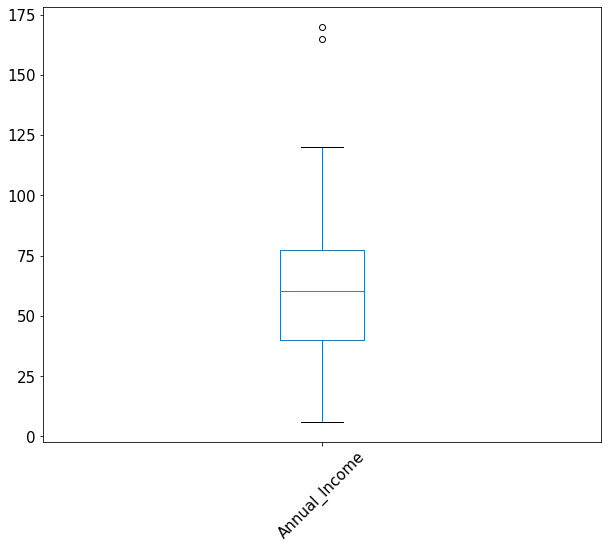

In [53]:
customers_data_com[['Annual_Income']].boxplot(figsize=(10, 8), 
                                              fontsize=15, 
                                              grid=False, rot=45);

In [54]:
customers_data_com.loc[customers_data_com['Annual_Income'] > 125]                                         

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
198,199,Male,32,170,70
199,200,Male,30,165,73


## Standard Scaler

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_annual_income = scaler.fit_transform(customers_data_com['Annual_Income'].values.reshape(-1, 1))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [56]:
scaled_annual_income.shape

(200, 1)

In [57]:
customers_data_com['Scaled_Annual_Income'] = scaled_annual_income

In [58]:
customers_data_com['Scaled_Annual_Income'].describe()

count    2.000000e+02
mean     2.620126e-16
std      1.002509e+00
min     -1.944947e+00
25%     -7.161410e-01
50%      2.475683e-02
75%      6.301246e-01
max      3.982236e+00
Name: Scaled_Annual_Income, dtype: float64

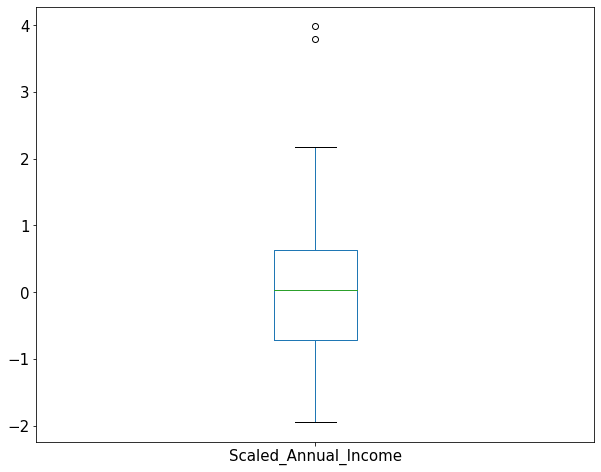

In [59]:
customers_data_com.boxplot(figsize=(10, 8), grid=False, 
                           fontsize=15, column=['Scaled_Annual_Income']);

In [60]:
outliers = np.where(customers_data_com['Scaled_Annual_Income'] > 3)

outliers

(array([198, 199]),)

In [61]:
customers_data_com.iloc[outliers]

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100),Scaled_Annual_Income
198,199,Male,32,170,70,3.982236
199,200,Male,30,165,73,3.801529


In [62]:
customers_data_outliers_removed = customers_data_com.drop(customers_data_com.index[outliers])

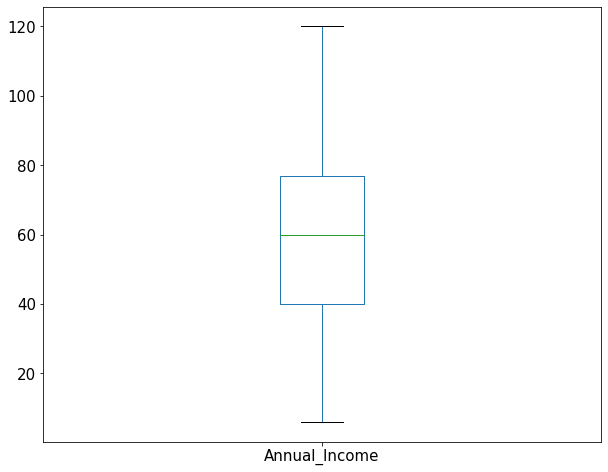

In [63]:
customers_data_outliers_removed.boxplot(figsize=(10, 8), grid=False, 
                                        fontsize=15, column=['Annual_Income']);